# OCR and text to speech [english] Translate in Native languages

##### OCR using Tesseract 
##### Text to speech using gTTs API
##### Translate to native language using Googletrans API

#### import required modules for OCR

In [1]:
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
import cv2
import numpy as np

C:\Users\Priya\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Priya\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Priya\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
img_path=input('Enter path of image: ') #path of image stored in your computer

Enter path of image: C:\Users\Priya\Desktop\data science\OCR\image.jpg


#### sample image fed in
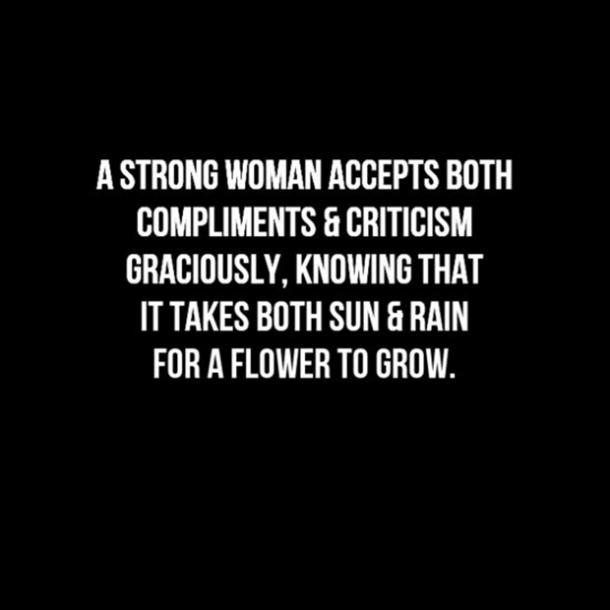

In [3]:
img=cv2.imread(img_path) # read the image
#cv2.imshow('Image Result',img)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #cv2 default is BGR but tesseract accepts RGB values, hence converting
box=pytesseract.image_to_data(img) # image to data function sees every line for words
hi,wi,_ =img.shape # image.shape gives 3 values of row, height and 2 if grey scale/3 if RGB
#print(hi,wi)
voice=[] # a list is declared to store the words/string
COLORS = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255)) #optional line used to change the color of rectangle surrounding the words
for x,b in enumerate(box.splitlines()): # every output is split into rows
    if x!=0:# as the first loop has the column names which are strings
        b=b.split() # this will split the values and store in list b
        #print(b)
        # remove comment in line 12, you'll notice how the rows and columns are
        if len(b)==12: # only the row has 12 columns (i.e) 12 elements in list b the below codes will execute
            x,y,w,h=int(b[6]),int(b[7]),int(b[8]),int(b[9])#rows,columns,height and width of particular word is fed. For indexing related query ref line 12
            cv2.rectangle(img, (x,y), (x+w,h+y),COLORS, 2) # this generates the rectangle around the words
            #print(b[11])
            # line 12, gives the desired word
            voice.append(b[11])# the values are added to list voice
voice=' '.join(voice)# converting list to string
print(voice)
img=cv2.putText(img,voice,(0, 30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)#displaying the read text on top of image
cv2.imshow('Result',img)# image is displayed
cv2.waitKey(7000)# delay created for 7000ms or 7s
cv2.destroyAllWindows()

A STRONG WOMAN ACCEPTS BOTH COMPLIMENTS & CRITICISM GRACIOUSLY, KNOWING THAT IT TAKES BOTH SUN & RAIN FOR A FLOWER TO GROW.


#### sample Output
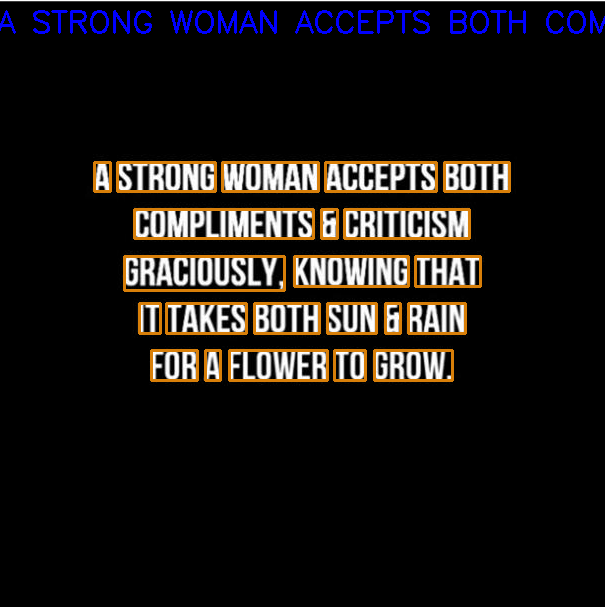

#### Play the text in english

In [4]:
import gtts #its an API used for converting text to speech 
from gtts import gTTS
import os

In [5]:
tts=gTTS(text=voice,lang='en') #here voice is the variable which has the desired string. Refer previous cells
tts.save('C://Users//Priya//Desktop//data science//OCR//English.mp3') # A copy of Audio is stored in your device in the given location

In [6]:
import IPython # to listen to audio in ipynb
IPython.display.Audio("English.mp3") 

#### Translate in native languages

In [7]:
import googletrans # An API for translation
from googletrans import Translator # A class inside this google translate API

In [8]:
# list of languages available in that API
a=googletrans.LANGUAGES.items()
for i in a:
    print(i)

('af', 'afrikaans')
('sq', 'albanian')
('am', 'amharic')
('ar', 'arabic')
('hy', 'armenian')
('az', 'azerbaijani')
('eu', 'basque')
('be', 'belarusian')
('bn', 'bengali')
('bs', 'bosnian')
('bg', 'bulgarian')
('ca', 'catalan')
('ceb', 'cebuano')
('ny', 'chichewa')
('zh-cn', 'chinese (simplified)')
('zh-tw', 'chinese (traditional)')
('co', 'corsican')
('hr', 'croatian')
('cs', 'czech')
('da', 'danish')
('nl', 'dutch')
('en', 'english')
('eo', 'esperanto')
('et', 'estonian')
('tl', 'filipino')
('fi', 'finnish')
('fr', 'french')
('fy', 'frisian')
('gl', 'galician')
('ka', 'georgian')
('de', 'german')
('el', 'greek')
('gu', 'gujarati')
('ht', 'haitian creole')
('ha', 'hausa')
('haw', 'hawaiian')
('iw', 'hebrew')
('he', 'hebrew')
('hi', 'hindi')
('hmn', 'hmong')
('hu', 'hungarian')
('is', 'icelandic')
('ig', 'igbo')
('id', 'indonesian')
('ga', 'irish')
('it', 'italian')
('ja', 'japanese')
('jw', 'javanese')
('kn', 'kannada')
('kk', 'kazakh')
('km', 'khmer')
('ko', 'korean')
('ku', 'kurdish 

In [9]:
d=input('Enter the language code that you want to convert to: ')

Enter the language code that you want to convert to: ta


In [10]:
translator = Translator() # create object translator for the class Translator
result = translator.translate(text=voice, src='en', dest=d) #src depicts source language, dest depicts the language to which we want our output to be
print(result.text)
native=result.text

ஒரு வலுவான பெண் இருவரும் பாராட்டுக்களை & விமர்சனத்தை கருணையுடன் ஏற்றுக்கொள்கிறார், அது ஒரு மலர் வளர சூரியன் & மழை இருவரும் எடுக்கும் என்று தெரிந்தும்.


In [11]:
tts=gTTS(text=native,lang='ta')
tts.save('C://Users//Priya//Desktop//data science//OCR//Native.mp3')

In [12]:
IPython.display.Audio("Native.mp3")